We were testing an adaptive linear control variate that goes through the initial condition.

20.228343276703818
21.55104134424235
18.27674818125741
15.843014997373773
16.929765255195647


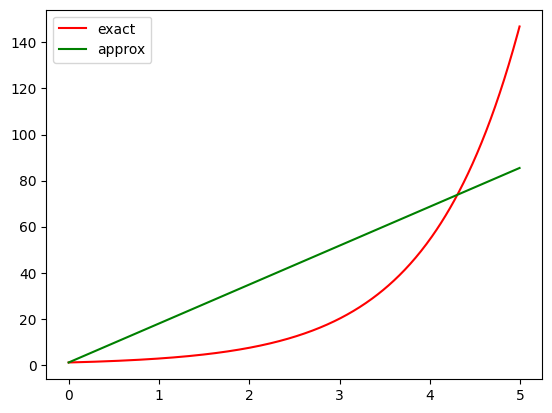

16.929765255195647


In [521]:
from random import random
import numpy as np
import matplotlib.pyplot as plt

def control(x,a): return a*x+1

def Y(t,a): 
    S = random()*t
    return 1+t +a*t**2/2 + ((Y(S,a)-control(S,a) if random()<t else 0) if t<1 else t*(Y(S,a)-control(S,a)) )

def A(t,a):
    S = random()*t
    return a+ 3*(Y(S,a)- a*S-1)*S/t**2

a,t,nsim = 0,5,10**3
for _ in range(5):
    a = sum(A(t,a) for _ in range(nsim))/nsim 
    print(a)

xs = np.arange(0,t,0.01)
ys = np.exp(xs)
zs = a*xs+1

plt.plot(xs,ys,color="red", label="exact")
plt.plot(xs,zs,color="green", label="approx")

plt.legend()
plt.show()
print(a)